# API - REQUEST - CURL

# Curl - Intro

## Common Options

`-#, --progress-bar`
        Make curl display a simple progress bar instead of the more informational standard meter.

`-b, --cookie <name=data>`
        Supply cookie with request. If no `=`, then specifies the cookie file to use (see `-c`).

`-c, --cookie-jar <file name>`
        File to save response cookies to.

`-d, --data <data>`
        Send specified data in POST request. Details provided below.

`-f, --fail`
        Fail silently (don't output HTML error form if returned). 

`-F, --form <name=content>`
        Submit form data.

`-H, --header <header>`
        Headers to supply with request.

`-i, --include`
        Include HTTP headers in the output.

`-I, --head`
        Fetch headers only.

`-k, --insecure`
        Allow insecure connections to succeed.

`-L, --location`
        Follow redirects.

`-o, --output <file>`
        Write output to <file>. Can use `--create-dirs` in conjunction with this to create any directories
        specified in the `-o` path.

`-O, --remote-name`
        Write output to file named like the remote file (only writes to current directory).

`-s, --silent`
        Silent (quiet) mode. Use with `-S` to force it to show errors.

`-v, --verbose`
        Provide more information (useful for debugging).

`-w, --write-out <format>`
        Make curl display information on stdout after a completed transfer. See man page for more details on
        available variables. Convenient way to force curl to append a newline to output: `-w "\n"` (can add
        to `~/.curlrc`).
        
`-X, --request`
        The request method to use.


## POST

When sending data via a POST or PUT request, two common formats (specified via the `Content-Type` header) are:
  * `application/json`
  * `application/x-www-form-urlencoded`

Many APIs will accept both formats, so if you're using `curl` at the command line, it can be a bit easier to use the form urlencoded format instead of json because
  * the json format requires a bunch of extra quoting
  * curl will send form urlencoded by default, so for json the `Content-Type` header must be explicitly set

This gist provides examples for using both formats, including how to use sample data files in either format with your `curl` requests.

## curl usage

For sending data with POST and PUT requests, these are common `curl` options:

 * request type
   * `-X POST`
   * `-X PUT`

 * content type header
  * `-H "Content-Type: application/x-www-form-urlencoded"`
  * `-H "Content-Type: application/json"`
 
* data
  * form urlencoded: `-d "param1=value1&param2=value2"` or `-d @data.txt`
  * json: `-d '{"key1":"value1", "key2":"value2"}'` or `-d @data.json`
  
## Examples

### POST application/x-www-form-urlencoded

`application/x-www-form-urlencoded` is the default:

    curl -d "param1=value1&param2=value2" -X POST http://localhost:3000/data

explicit:

    curl -d "param1=value1&param2=value2" -H "Content-Type: application/x-www-form-urlencoded" -X POST http://localhost:3000/data

with a data file
 
    curl -d "@data.txt" -X POST http://localhost:3000/data

### POST application/json

    curl -d '{"key1":"value1", "key2":"value2"}' -H "Content-Type: application/json" -X POST http://localhost:3000/data
    
with a data file
 
    curl -d "@data.json" -X POST http://localhost:3000/data



# Requests

In [ ]:
import requests
import pandas as pd
import numpy as np

In [ ]:
# generalmente vamos a necesitar una API_key que nos proveean.
# a veces va en el cuerpo del request (no es lo mas seguro pero las gratis a veces lo permiten) aunque generalmente uno se autentifica primero en un endpoint, y obtiene una sesion autorizada. 

API_key= '238be0ed9a3f17b46db62276edc4dc96'

In [ ]:
city_name = 'buenos aires'

In [ ]:
buenos_aires = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_key}'
londres = f'http://api.openweathermap.org/data/2.5/weather?q=London&appid={API_key}'

In [ ]:
r = requests.get(buenos_aires)

In [ ]:
# Asi viene el response. Es un string, entonces para operar tenemos que usar el metodo .json() que lo transforma en un Diccionario.
r.text

'{"coord":{"lon":-58.3772,"lat":-34.6132},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":296.73,"feels_like":296.55,"temp_min":295.81,"temp_max":299.22,"pressure":1020,"humidity":54},"visibility":10000,"wind":{"speed":10.29,"deg":100},"clouds":{"all":0},"dt":1636743311,"sys":{"type":1,"id":8224,"country":"AR","sunrise":1636706534,"sunset":1636756398},"timezone":-10800,"id":3435910,"name":"Buenos Aires","cod":200}'

In [ ]:
response_dict = r.json()

In [ ]:
type(response_dict)

dict

In [ ]:
response_dict

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.6132, 'lon': -58.3772},
 'dt': 1636743311,
 'id': 3435910,
 'main': {'feels_like': 296.55,
  'humidity': 54,
  'pressure': 1020,
  'temp': 296.73,
  'temp_max': 299.22,
  'temp_min': 295.81},
 'name': 'Buenos Aires',
 'sys': {'country': 'AR',
  'id': 8224,
  'sunrise': 1636706534,
  'sunset': 1636756398,
  'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
   'icon': '01d',
   'id': 800,
   'main': 'Clear'}],
 'wind': {'deg': 100, 'speed': 10.29}}

In [ ]:
# Podemos tener campos anidados, en ese caso ingresamos con las keys dentro de cada key
response_dict['main']

{'feels_like': 296.55,
 'humidity': 54,
 'pressure': 1020,
 'temp': 296.73,
 'temp_max': 299.22,
 'temp_min': 295.81}

In [ ]:
# Ver la documentacion para ver de que forma vienen los datos ( Farenheit )
response_dict['main']['temp']

296.73

In [ ]:
# Cambiamos la metrica
buenos_aires_simela = f'https://api.openweathermap.org/data/2.5/find?q={city_name}&units=metric&appid={API_key}'

In [ ]:
r2 = requests.get(buenos_aires_simela)

In [ ]:
r2.text

'{"message":"accurate","cod":"200","count":5,"list":[{"id":3435910,"name":"Buenos Aires","coord":{"lat":-34.6132,"lon":-58.3772},"main":{"temp":23.74,"feels_like":23.68,"temp_min":21.85,"temp_max":27.22,"pressure":1019,"humidity":58},"dt":1636744144,"wind":{"speed":10.8,"deg":110},"sys":{"country":"AR"},"rain":null,"snow":null,"clouds":{"all":0},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}]},{"id":3624593,"name":"Buenos Aires","coord":{"lat":9.1719,"lon":-83.3342},"main":{"temp":29.11,"feels_like":31.71,"temp_min":29.11,"temp_max":29.11,"pressure":1011,"humidity":63,"sea_level":1011,"grnd_level":969},"dt":1636744148,"wind":{"speed":1.91,"deg":217},"sys":{"country":"CR"},"rain":null,"snow":null,"clouds":{"all":49},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}]},{"id":4016589,"name":"Buenos Aires","coord":{"lat":19.0667,"lon":-102.1667},"main":{"temp":28.04,"feels_like":29.62,"temp_min":28.04,"temp_max":28.04,"pressure"

In [ ]:
r2.json()

{'cod': '200',
 'count': 5,
 'list': [{'clouds': {'all': 0},
   'coord': {'lat': -34.6132, 'lon': -58.3772},
   'dt': 1636744144,
   'id': 3435910,
   'main': {'feels_like': 23.68,
    'humidity': 58,
    'pressure': 1019,
    'temp': 23.74,
    'temp_max': 27.22,
    'temp_min': 21.85},
   'name': 'Buenos Aires',
   'rain': None,
   'snow': None,
   'sys': {'country': 'AR'},
   'weather': [{'description': 'clear sky',
     'icon': '01d',
     'id': 800,
     'main': 'Clear'}],
   'wind': {'deg': 110, 'speed': 10.8}},
  {'clouds': {'all': 49},
   'coord': {'lat': 9.1719, 'lon': -83.3342},
   'dt': 1636744148,
   'id': 3624593,
   'main': {'feels_like': 31.71,
    'grnd_level': 969,
    'humidity': 63,
    'pressure': 1011,
    'sea_level': 1011,
    'temp': 29.11,
    'temp_max': 29.11,
    'temp_min': 29.11},
   'name': 'Buenos Aires',
   'rain': None,
   'snow': None,
   'sys': {'country': 'CR'},
   'weather': [{'description': 'scattered clouds',
     'icon': '03d',
     'id': 802,
 

# Google Trends API

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()
import matplotlib as mtp
from matplotlib import pyplot as plt

In [ ]:
pytrend.build_payload(kw_list=['Python'])
# Interest by Region
df = pytrend.interest_by_region()
df.head(50).sort_values(by='Python', ascending=False)

,Python
geoName,
China,100
Australia,4
Canada,4
Bangladesh,3
Belarus,3
Belgium,3
Austria,3
Colombia,2
Chile,2


**Now you might be thinking what are the values, what do they denote?** 

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

In [ ]:
df.reset_index(inplace=True)
df.sort_values(by='Python', inplace=True)

In [ ]:
df.shape

(250, 2)

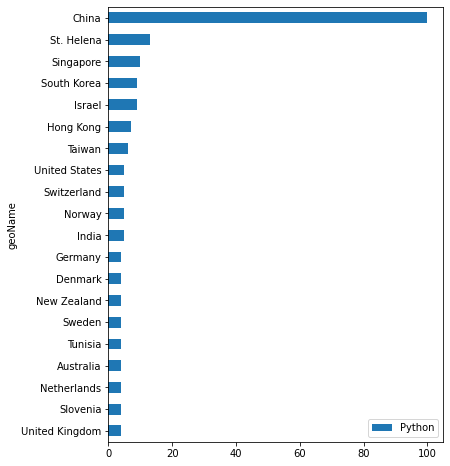

In [ ]:
df[230:].plot(x='geoName', y='Python', figsize=(6, 8), kind ='barh')

In [ ]:
# Segundo ejemplo

# data
# https://hackernoon.com/how-to-use-google-trends-api-with-python

# DOCS https://github.com/GeneralMills/pytrends?ref=hackernoon.com#api-methods

In [ ]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360) 

In [ ]:

kw_list = ["machine learning"] # list of keywords to get data 

pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m') 

In [ ]:
data.head()

,date,machine learning,isPartial
0,2020-11-15,88,False
1,2020-11-22,81,False
2,2020-11-29,83,False
3,2020-12-06,83,False
4,2020-12-13,83,False


In [ ]:
#1 Interest over Time
data = pytrends.interest_over_time() 
data = data.reset_index() 


import plotly.express as px

fig = px.line(data, x="date", y='machine learning', title='Keyword Web Search Interest Over Time')
fig.show() 

In [ ]:
pytrends.get_historical_interest(kw_list, 
                                 year_start=2021, 
                                 month_start=9, 
                                 day_start=1, 
                                 hour_start=0, 
                                 year_end=2021, 
                                 month_end=9, 
                                 day_end=30, 
                                 hour_end=0, 
                                 cat=0, 
                                 sleep=0)

,machine learning,isPartial
date,,
2021-09-29 00:00:00,0,False
2021-09-29 01:00:00,0,False
2021-09-29 02:00:00,0,False
2021-09-29 03:00:00,0,False
2021-09-29 04:00:00,0,False
2021-09-29 05:00:00,0,False
2021-09-29 06:00:00,0,False
2021-09-29 07:00:00,0,False
2021-09-29 08:00:00,0,False
